In [37]:
import numpy as np 
import tensorflow as tf 
from tensorflow import keras
import pandas as pd 
import matplotlib.pyplot as plt#c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses.py:2976
%matplotlib inline

In [38]:
data=pd.read_csv("homeprices_banglore.csv")
data.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [39]:
from sklearn import preprocessing
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()
scaled_x=sx.fit_transform(data.drop(columns=["price"]))

In [40]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [41]:
scaled_sy=sy.fit_transform(data["price"].values.reshape(data.shape[0],1))
scaled_sy

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [42]:
np.dot(w,scaled_x.T)

array([0.23106335, 0.9448289 , 0.49333773, 0.51308845, 0.26617575,
       0.25886067, 0.97701526, 1.11551416, 0.46163904, 1.38168991,
       0.58111872, 0.98993858, 0.21740853, 0.24179214, 0.69084495,
       0.26007985, 0.42994035, 0.51772134, 0.81763972, 0.        ])

In [43]:
scaled_x.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [44]:
w=np.ones(shape=(2))

In [45]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features=X.shape[1]
    w=np.ones(shape= (number_of_features))
    b=0
    total_samples=X.shape[0]
    cost_list=[]
    epoch_list=[]
    for i in range(epochs):
        y_pred=np.dot(w,scaled_x.T)+b
        w_grad=(-2/total_samples)*( X.T.dot(y_true-y_pred))
        b_grad=(-2/total_samples)*np.sum(y_true-y_pred)
        
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        
        cost=np.mean(np.square(y_true-y_pred))

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list
w,b, cost, cost_list,epoch_list=batch_gradient_descent(scaled_x,scaled_sy.reshape(scaled_sy.shape[0],),500)
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

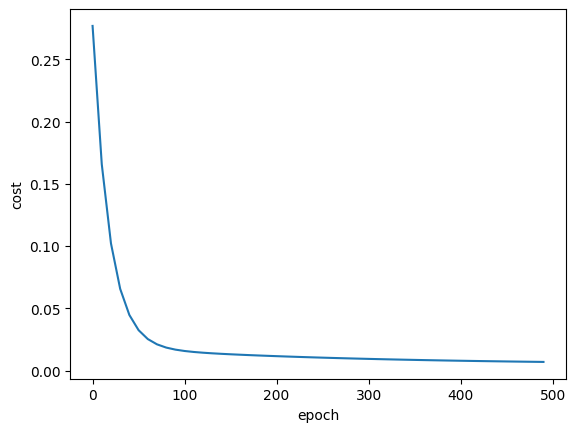

In [46]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)
plt.show()

In [47]:
sx.transform([[2600,4]])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.62068966, 0.75      ]])

In [48]:
def predict(area,bedroom,w,b):
    scaled_x=sx.transform([[area,bedroom]])[0]
    scaled_price=w[0]*scaled_x[0]+w[1]*scaled_x[1]+b
    return sy.inverse_transform([[scaled_price]])[0][0]#passing a two dimensional array because these scalars require 2 dimensional array
predict(2600,4,w,b)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [51]:
import random 
random.randint(0,6)

5

In [58]:
def stochastic_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    #numpy array with 1 row and columns equal to number of features .In our case number_of_features=3 
    number_of_features=X.shape[1]
    w=np.ones(shape= (number_of_features))
    b=0
    total_samples=X.shape[0]
    cost_list_sgd=[]
    epoch_list_sgd=[]
    for i in range(epochs):
        random_index=random.randint(0,total_samples-1)
        sample_x=X[random_index]
        sample_y=y_true[random_index]
        y_pred=np.dot(w,sample_x.T)+b
        w_grad=(-2/total_samples)*( sample_x.T.dot(sample_y-y_pred))
        b_grad=(-2/total_samples)*np.sum(sample_y-y_pred)
        
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        
        cost=np.square(sample_y-y_pred)

        if i%100==0:
            cost_list_sgd.append(cost)
            epoch_list_sgd.append(i)
    return w,b,cost,cost_list_sgd,epoch_list_sgd
w_sgd,b_sgd, cost_sgd, cost_list_sgd,epoch_list_sgd=stochastic_gradient_descent(scaled_x,scaled_sy.reshape(scaled_sy.shape[0],),10000)
w_sgd,b_sgd,cost_sgd

(array([0.70818192, 0.67474551]), -0.23006688581020482, 0.0015483719176838473)

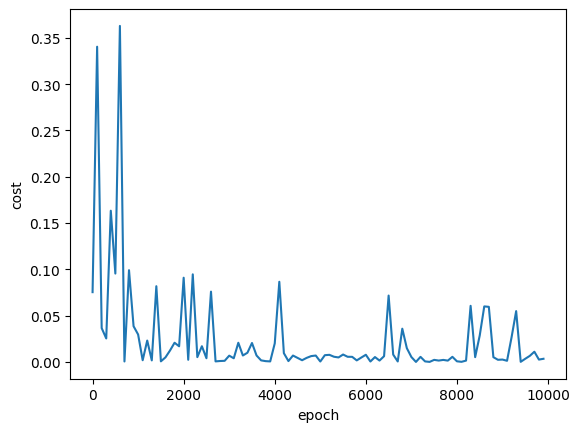

In [59]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)
plt.show()

In [60]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_x,
    scaled_sy.reshape(scaled_sy.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.71007739, 0.67807766]), -0.23339083901858942, 0.014358306705518482)